In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from scipy.stats import gaussian_kde

%matplotlib notebook

# Question 1

## Load Data

In [25]:
data = pd.read_csv('./data/COVIDincubation.txt', sep=",")
data.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


## (a) Histograms

<IPython.core.display.Javascript object>


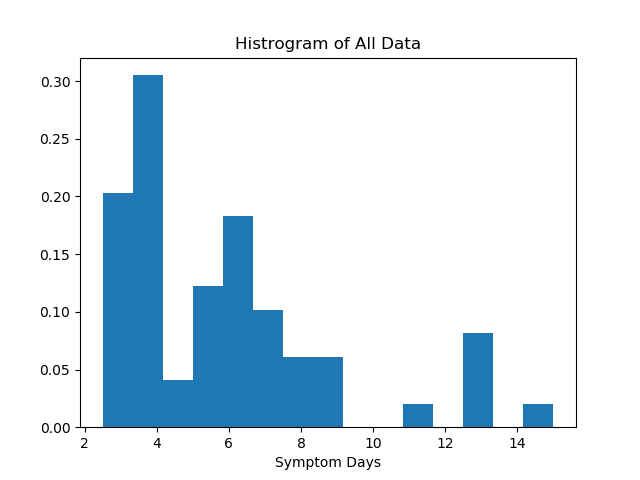

In [26]:
plt.hist(data['symp_days'], bins = 15, density = True)
plt.title('Histrogram of All Data')
plt.xlabel('Symptom Days')
plt.show()

<IPython.core.display.Javascript object>


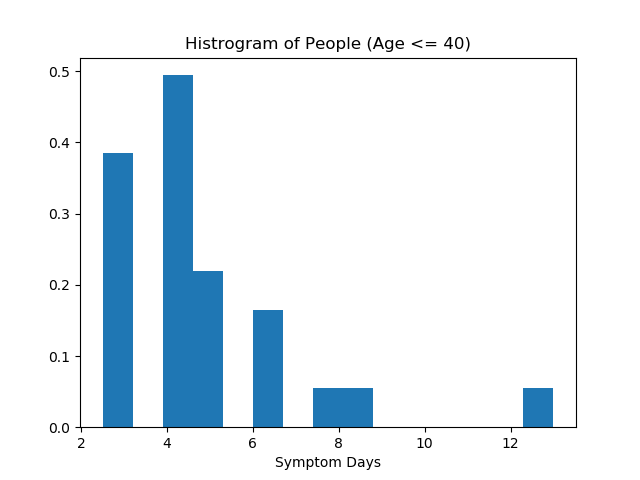

In [27]:
plt.hist(data[data['age'] <= 40]['symp_days'], bins = 15, density = True)
plt.title('Histrogram of People (Age <= 40)')
plt.xlabel('Symptom Days')
plt.show()

<IPython.core.display.Javascript object>


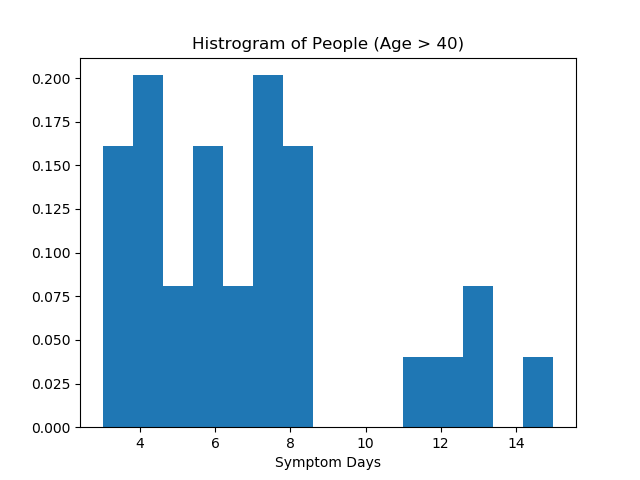

In [28]:
plt.hist(data[data['age'] > 40]['symp_days'], bins = 15, density = True)
plt.title('Histrogram of People (Age > 40)')
plt.xlabel('Symptom Days')
plt.show()

## (b) Optimal bandwith

In [29]:
# All data
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
symp_days = data['symp_days'].values.reshape(-1,1)
grid.fit(symp_days)

k1 = grid.best_params_['bandwidth']
k1

0.8910453324821516

In [30]:
# People <= 40
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
symp_days = data[data['age'] <= 40]['symp_days'].values.reshape(-1,1)
grid.fit(symp_days)

k2 = grid.best_params_['bandwidth']
k2

1.6233824316122782

In [31]:
# People > 40
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
symp_days = data[data['age'] > 40]['symp_days'].values.reshape(-1,1)
grid.fit(symp_days)

k3 = grid.best_params_['bandwidth']
k3

1.1861737164524786

The result shows that the best bandwith for all data is 0.891, the best bandwith for people under 40 is 1.623, and the optimal bandwith for people greater than 40 is 1.186.

<IPython.core.display.Javascript object>


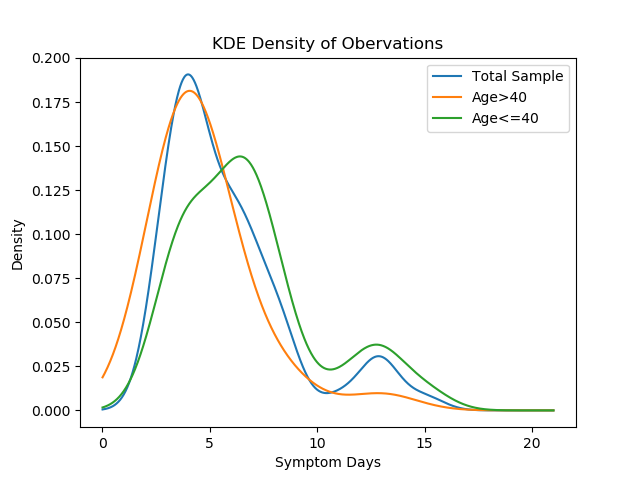

In [32]:
# plot the KDE (total sample)
kde_total = KernelDensity(bandwidth=k1, kernel='gaussian')
kde_total.fit(data['symp_days'].values.reshape(-1,1))

x_pts = np.linspace(0.01, 21, 1000).reshape((-1, 1))
logprob_total = kde_total.score_samples(x_pts).reshape((-1, 1))
plt.plot(x_pts, np.exp(logprob_total), label=r'Total Sample')
plt.legend()
plt.title('KDE Density of Obervations')
plt.xlabel('Symptom Days')
plt.ylabel('Density')

# plot the KDE (age>40 sample)
kde_old = KernelDensity(bandwidth=k2, kernel='gaussian')
kde_old.fit(data[data['age'] <= 40]['symp_days'].values.reshape(-1,1))

x_pts = np.linspace(0.01, 21, 1000).reshape((-1, 1))
logprob_old = kde_old.score_samples(x_pts).reshape((-1, 1))
plt.plot(x_pts, np.exp(logprob_old), label=r'Age>40')
plt.legend()

# plot the KDE (age<=40 sample)
kde_young = KernelDensity(bandwidth=k3, kernel='gaussian')
kde_young.fit(data[data['age'] > 40]['symp_days'].values.reshape(-1,1))

x_pts = np.linspace(0.01, 21, 1000).reshape((-1, 1))
logprob_old = kde_young.score_samples(x_pts).reshape((-1, 1))
plt.plot(x_pts, np.exp(logprob_old), label=r'Age<=40')
plt.legend()

The figure shows that the incubation period of young people are shorter than old people in average.

## Question 2

<IPython.core.display.Javascript object>


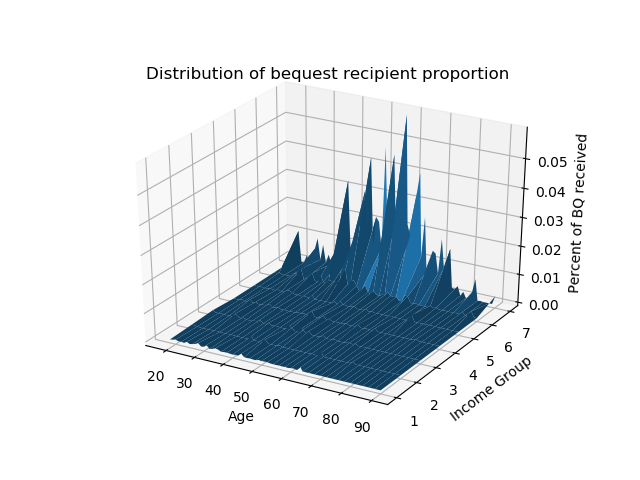

Text(0.5, 0, 'Percent of BQ received')

In [33]:
bd_data = np.loadtxt('./data/BQ_probmat.txt', delimiter = ',')
# scale the data
bd_data = bd_data / bd_data.sum()
# Make 3D surface plot of rough bequests distribution matrix
Age = range(18, 91)
Group = range(1,8)
X, Y = np.meshgrid(Age, Group)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, bd_data.T)
ax.set_title('Distribution of bequest recipient proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

<IPython.core.display.Javascript object>


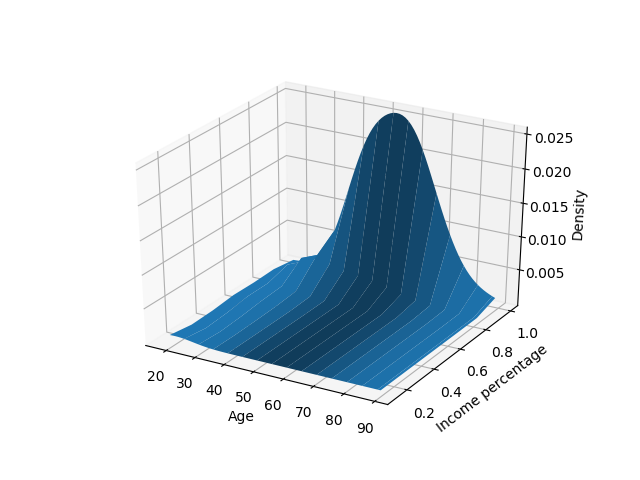

0.0011545946159573083

In [53]:
data = pd.read_csv('./data/BQ_ind_data.txt')
bandwidth = 0.55
kernel = gaussian_kde(data.T, bw_method=bandwidth)


age = data['age']
income = data['income_pctl']
age_min = age.min()
age_max = age.max()
income_min = income.min()
income_max = income.max()

age_i, income_i = np.mgrid[age_min:age_max,
                              income_min:income_max:7j]
coords = np.vstack([item.ravel() for item in [age_i, income_i]])

Z = np.reshape(kernel(coords), age_i.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_i, income_i, Z_scaled, rstride=5)
ax.set_xlabel("Age")
ax.set_ylabel("Income percentage")
ax.set_zlabel("Density")

Z_scaled[44,5]

It turns out that the best bandwith might be 0.55. The estimated density for bequest recipient who are age 61 in the 6th lifetime income category is 0.001154.